## Import Libraries and Dataset

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
folder_path = 'Datasets'
columns_to_load = ['m (kg)', 'Mt', 'ec (cm3)', 'ep (KW)', 'Fuel consumption ', 'Ewltp (g/km)']

# List to store the number of datapoints for each dataset
datasets_summary = []

# Dictionary to store preprocessed datasets
preprocessed_datasets = {}

# Load and process each file
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):  # Ensure the file is a CSV
        file_path = os.path.join(folder_path, file_name)
        
        # Load the dataset with low_memory=False
        df = pd.read_csv(file_path, low_memory=False)
        
        # Filter to keep only specified columns
        df = df[columns_to_load]
        
        # Drop rows with missing values
        df = df.dropna()
        
        # Save the cleaned dataset as a variable in the dictionary
        dataset_name = file_name.replace('.csv', '')  # Removing .csv extension for variable name
        preprocessed_datasets[dataset_name] = df
        
        # Record the dataset name and the number of rows
        datasets_summary.append((file_name, len(df)))
        
        # Optionally, display a preview of the cleaned dataset
        print(f"Preview of cleaned dataset: {file_name}")
        print(df.head(), "\n")

# Print the number of data points available for analysis
print("Number of datapoints available for analysis:")
for dataset_name, count in datasets_summary:
    print(f"{dataset_name}: {count} rows")

# Optionally, print the names of the variables (datasets)
print("\nPreprocessed datasets saved as variables:")
for dataset_name in preprocessed_datasets.keys():
    print(dataset_name)


Preview of cleaned dataset: Bulgaria.csv
   m (kg)      Mt  ec (cm3)  ep (KW)  Fuel consumption   Ewltp (g/km)
1    1229  1310.0     999.0     67.0                7.4         114.0
2    1678  1840.0    1461.0     85.0                5.7         149.0
3    1560  1649.0    1987.0    112.0                5.3         120.0
4    1171  1271.0     999.0     67.0                5.6         127.0
5    1965  2094.0    1497.0    116.0                6.6         149.0 

Preview of cleaned dataset: Estonia.csv
   m (kg)      Mt  ec (cm3)  ep (KW)  Fuel consumption   Ewltp (g/km)
0    1665  1780.0    2487.0      131                5.7         129.0
1    1665  1780.0    2487.0      131                5.7         129.0
2    1665  1780.0    2487.0      131                5.7         129.0
3    1665  1780.0    2487.0      131                5.7         129.0
4    1665  1780.0    2487.0      131                5.7         129.0 

Preview of cleaned dataset: Latvia.csv
   m (kg)    Mt  ec (cm3)  ep (KW)  

## Data Analysis

Dataset: Bulgaria.csv
Columns and their datatypes:
m (kg)                 int64
Mt                   float64
ec (cm3)             float64
ep (KW)              float64
Fuel consumption     float64
Ewltp (g/km)         float64
dtype: object 



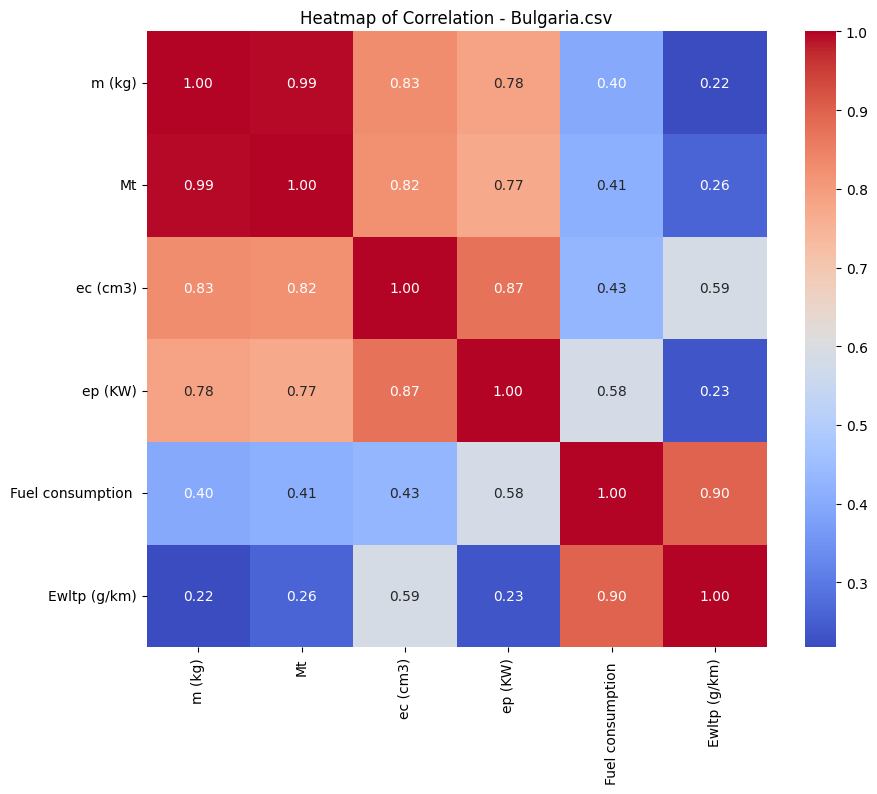

Dataset: Estonia.csv
Columns and their datatypes:
m (kg)                 int64
Mt                   float64
ec (cm3)             float64
ep (KW)                int64
Fuel consumption     float64
Ewltp (g/km)         float64
dtype: object 



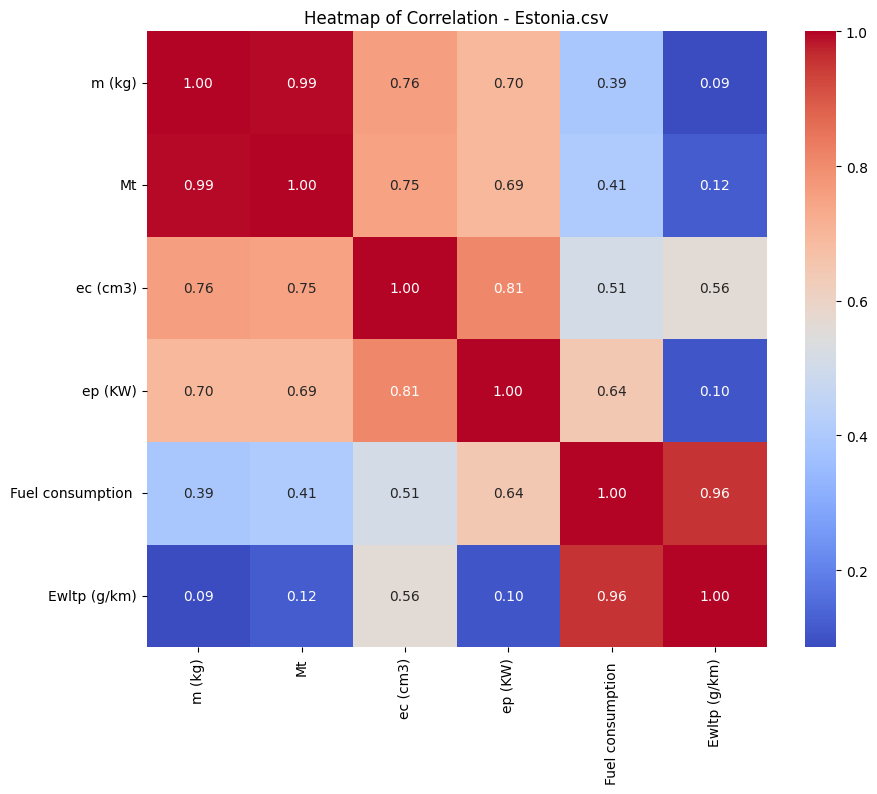

Dataset: Latvia.csv
Columns and their datatypes:
m (kg)                 int64
Mt                     int64
ec (cm3)             float64
ep (KW)                int64
Fuel consumption     float64
Ewltp (g/km)           int64
dtype: object 



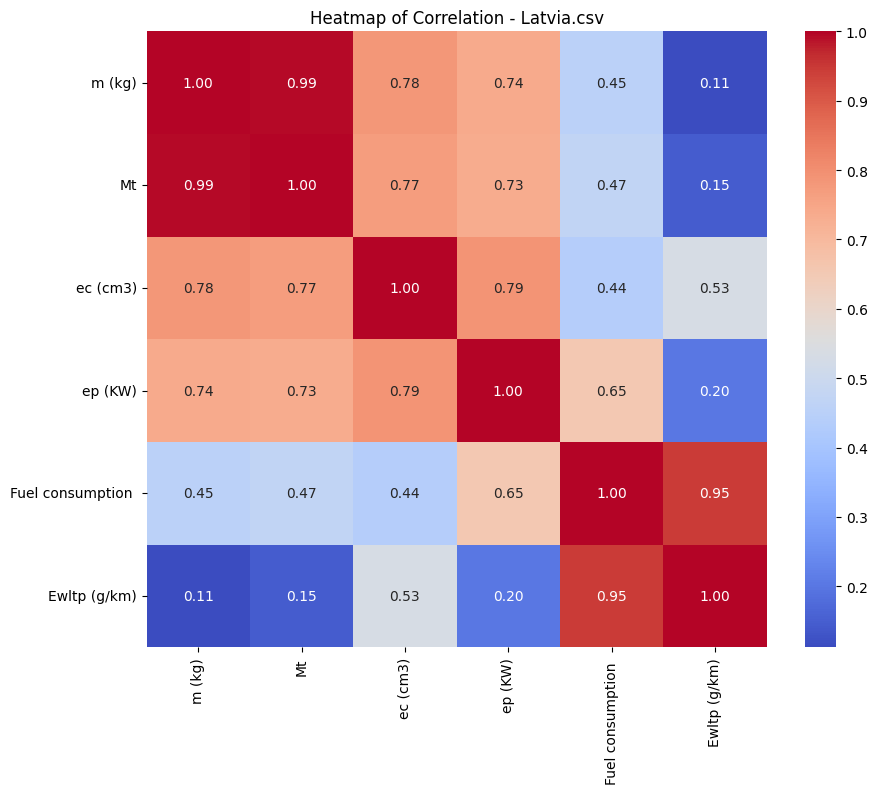

Dataset: Lithuania.csv
Columns and their datatypes:
m (kg)                 int64
Mt                   float64
ec (cm3)             float64
ep (KW)                int64
Fuel consumption     float64
Ewltp (g/km)           int64
dtype: object 



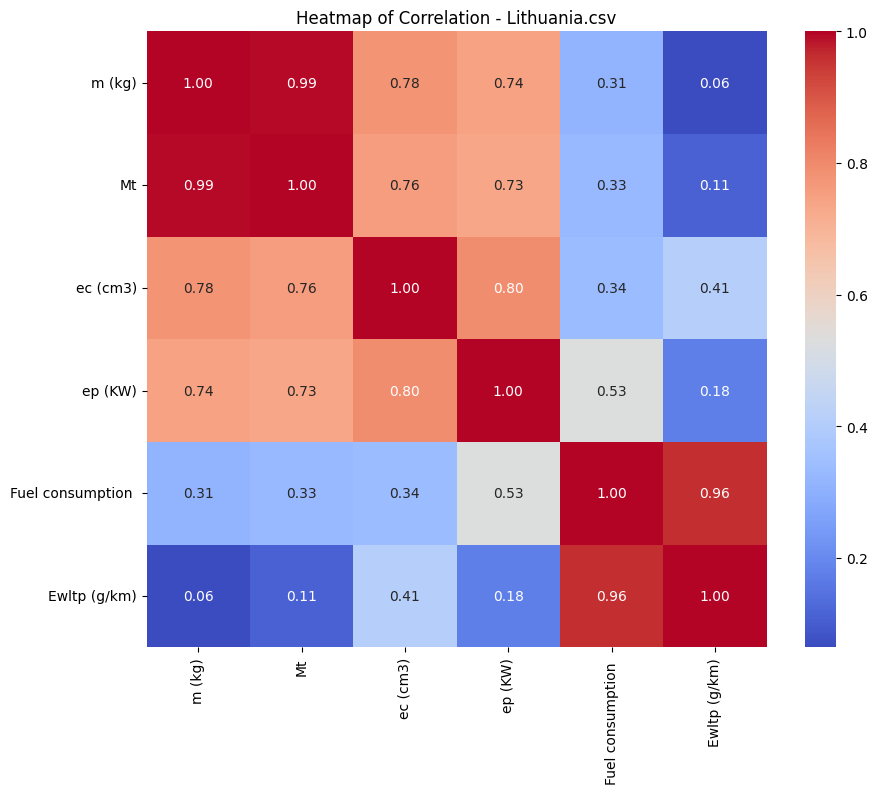

Dataset: Slovenia.csv
Columns and their datatypes:
m (kg)                 int64
Mt                   float64
ec (cm3)             float64
ep (KW)                int64
Fuel consumption     float64
Ewltp (g/km)         float64
dtype: object 



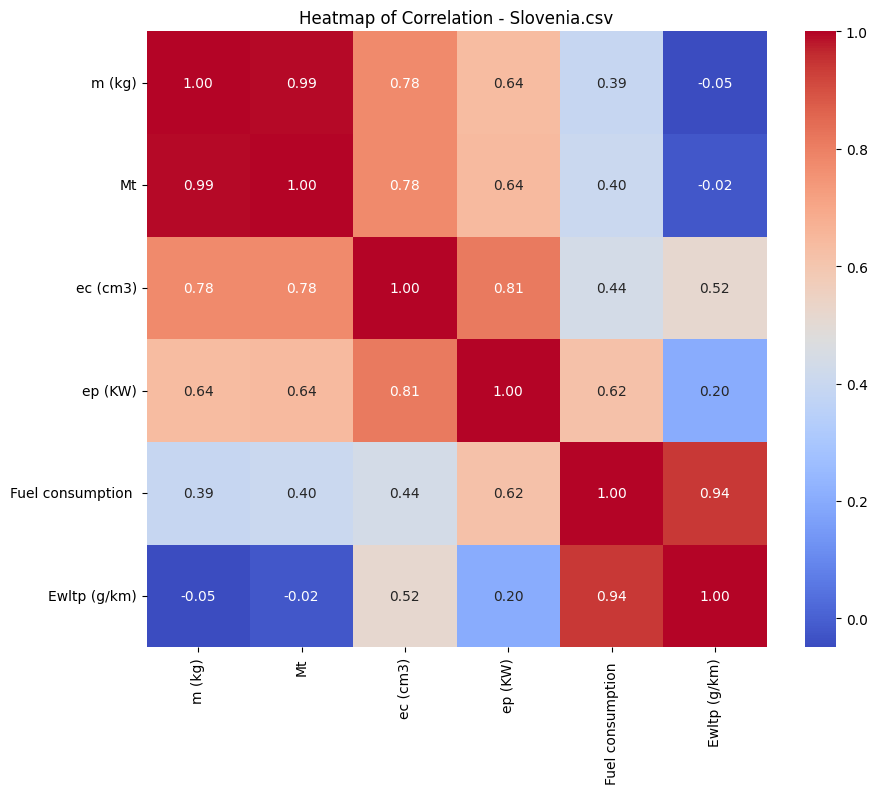

In [3]:

# Define a function to analyze datasets
def analyze_datasets(folder_path, columns_to_load):
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):  # Ensure the file is a CSV
            file_path = os.path.join(folder_path, file_name)
            
            # Load the dataset with the previously defined columns
            df = pd.read_csv(file_path, low_memory=False)
            
            # Filter to keep only the specified columns
            df = df[columns_to_load]
            
            # Print dataset name, columns, and their datatypes
            print(f"Dataset: {file_name}")
            print("Columns and their datatypes:")
            print(df.dtypes, "\n")
            
            # Plot the heatmap for correlation between features
            plt.figure(figsize=(10, 8))
            sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
            plt.title(f"Heatmap of Correlation - {file_name}")
            plt.show()

# Call the function with folder path and selected columns
analyze_datasets(folder_path='Datasets', columns_to_load=columns_to_load)


## Model Selection
Checking which model is best suited for this problem statement

### Linear Regression

In [4]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the features and target
X = preprocessed_datasets['Bulgaria'].drop(columns=['Ewltp (g/km)'])
y = preprocessed_datasets['Bulgaria']['Ewltp (g/km)']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline for Linear Regression
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('lr', LinearRegression())  # Linear Regression model
])

# Train the model
pipeline_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = pipeline_lr.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"R2 Score: {r2_lr}")


Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 9.243493412568323
Mean Squared Error (MSE): 199.70141712724146
R2 Score: 0.8755513828103734


### Random Forest

In [5]:
# Random Forest Model

# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Define the pipeline for Random Forest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42))  # Random Forest Regressor
])

# Train the model
pipeline_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = pipeline_rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print("\nRandom Forest Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R2 Score: {r2_rf}")



Random Forest Model Evaluation:
Mean Absolute Error (MAE): 0.6069214045799434
Mean Squared Error (MSE): 25.790749388163004
R2 Score: 0.9839278902282599


### Artificial Neural Networks

In [6]:
# Neural Network Model (MLP Regressor)

# Import necessary libraries
from sklearn.neural_network import MLPRegressor

# Define the pipeline for Neural Network with more iterations
pipeline_nn = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('nn', MLPRegressor(
        hidden_layer_sizes=(50, 50), 
        activation='relu', 
        random_state=42, 
        max_iter=1000,  # Increase max iterations to 1000
        solver='adam',  # Solver to use for optimization
        learning_rate_init=0.001  # Optional: adjusting learning rate
    ))  # Neural Network model
])

# Train the model
pipeline_nn.fit(X_train, y_train)

# Make predictions
y_pred_nn = pipeline_nn.predict(X_test)

# Evaluate the model
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# Print evaluation metrics
print("\nNeural Network Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_nn}")
print(f"Mean Squared Error (MSE): {mse_nn}")
print(f"R2 Score: {r2_nn}")



Neural Network Model Evaluation:
Mean Absolute Error (MAE): 2.1162286738460057
Mean Squared Error (MSE): 29.570968774026685
R2 Score: 0.9815721579454768


### Comparison

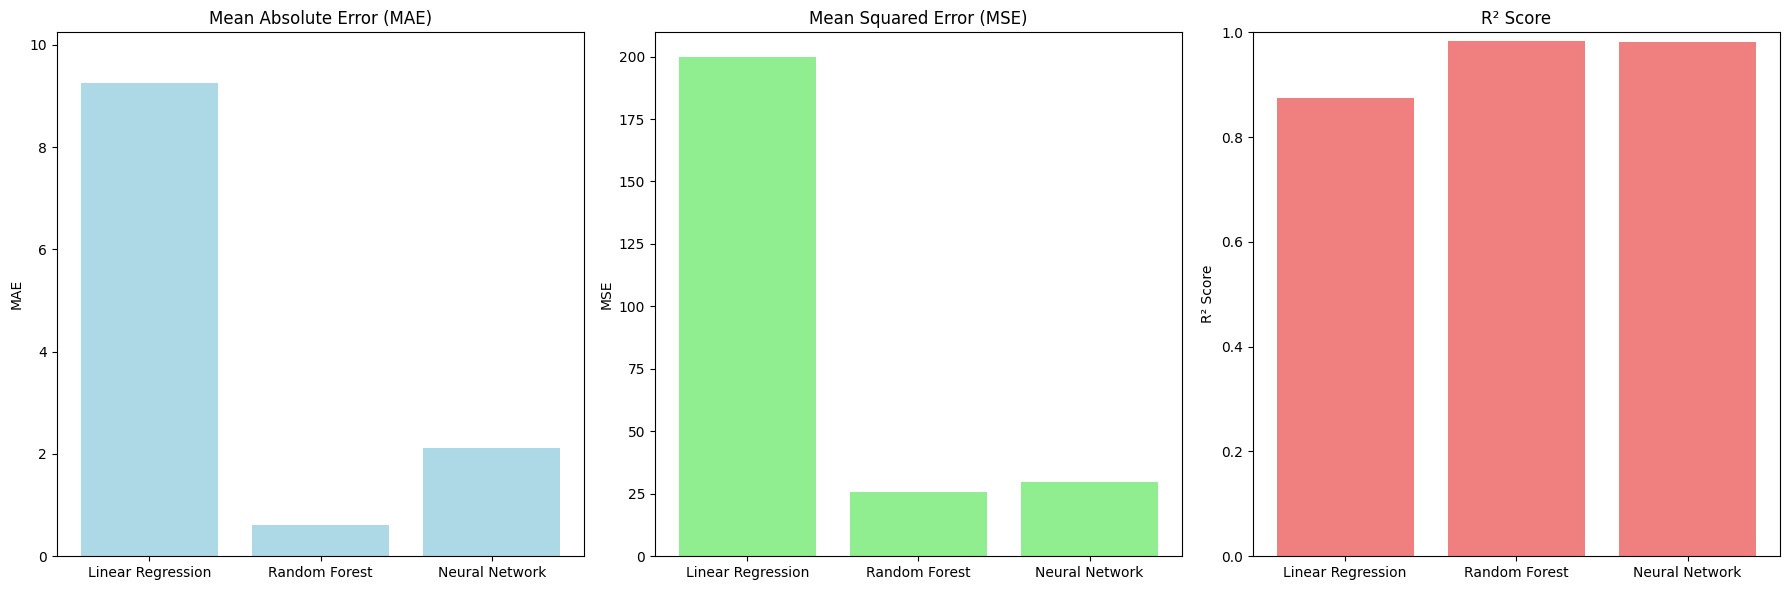

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Store the evaluation metrics for each model
models = ['Linear Regression', 'Random Forest', 'Neural Network']
mae_values = [mae_lr, mae_rf, mae_nn]
mse_values = [mse_lr, mse_rf, mse_nn]
r2_values = [r2_lr, r2_rf, r2_nn]

# Create subplots to show the evaluation metrics
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot MAE
axs[0].bar(models, mae_values, color='lightblue')
axs[0].set_title('Mean Absolute Error (MAE)')
axs[0].set_ylabel('MAE')
axs[0].set_ylim([0, max(mae_values) + 1])  # Set y-axis limits for better view

# Plot MSE
axs[1].bar(models, mse_values, color='lightgreen')
axs[1].set_title('Mean Squared Error (MSE)')
axs[1].set_ylabel('MSE')
axs[1].set_ylim([0, max(mse_values) + 10])  # Set y-axis limits for better view

# Plot R2 Score
axs[2].bar(models, r2_values, color='lightcoral')
axs[2].set_title('R² Score')
axs[2].set_ylabel('R² Score')
axs[2].set_ylim([0, 1])  # R² score is between 0 and 1

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


## Training on entire dataset together

In [26]:
datasets_without_bulgaria = {key: value for key, value in preprocessed_datasets.items() if 'Bulgaria' not in key}

combined_df = pd.concat(datasets_without_bulgaria.values(), ignore_index=True)

y_train_full = combined_df['Ewltp (g/km)']
X_train_full = combined_df.drop(columns=['Ewltp (g/km)'])


In [27]:
pipeline_nn = Pipeline([
    ('scaler', StandardScaler()),  
    ('nn', MLPRegressor(
        hidden_layer_sizes=(50, 50), 
        activation='relu', 
        random_state=42, 
        max_iter=1000, 
        solver='adam', 
        learning_rate_init=0.001  
    ))  
])

pipeline_nn.fit(X_train_full, y_train_full)

y_pred_nn = pipeline_nn.predict(X_test)

mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# Print evaluation metrics
print("\nNeural Network Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_nn}")
print(f"Mean Squared Error (MSE): {mse_nn}")
print(f"R2 Score: {r2_nn}")


Neural Network Model Evaluation:
Mean Absolute Error (MAE): 2.6632960758621125
Mean Squared Error (MSE): 70.28972203056175
R2 Score: 0.9561973127923618


## Implementation of Federated Learning Architechture

### Step 1: Create the Base Neural Network Model
In this step, we'll define the base Neural Network model that will be distributed across the clients. We will use the same Neural Network architecture that you selected earlier (MLP Regressor).

In [14]:
from sklearn.neural_network import MLPRegressor

# Function to create a base neural network model
def create_base_model():
    # Create and compile the MLP Regressor model (a simple feed-forward neural network)
    model = MLPRegressor(
        hidden_layer_sizes=(50, 50), 
        activation='relu', 
        random_state=42, 
        max_iter=1000,  # Increase max iterations to 1000
        solver='adam',  # Solver to use for optimization
        learning_rate_init=0.001  # Optional: adjusting learning rate
    )
    return model

# Create the base model
base_model = create_base_model()

# Print summary of the base model
print("Base Model Created: Neural Network Architecture")
print(base_model)


Base Model Created: Neural Network Architecture
MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)


### Step 2: Distribute the Model Across Clients (Estonia, Latvia, Lithuania, Slovenia)
In this step, we simulate the distribution of the base model across the four client datasets: Estonia, Latvia, Lithuania, and Slovenia. Each dataset will train the model separately, and we'll print the parameters (weights) of each trained model.

In [15]:
trained_models = {}

for client, data in preprocessed_datasets.items():
    # Separate features and target (Ewltp (g/km))
    X = data[columns_to_load[:-1]] 
    y = data[columns_to_load[-1]]  

    client_model = create_base_model()

    client_model.fit(X, y)

    trained_models[client] = client_model

    print(f"Trained Model Weights for {client}:")
    print("Weights:", client_model.coefs_)
    print("Intercept:", client_model.intercepts_)
    print("-" * 50)

Trained Model Weights for Bulgaria:
Weights: [array([[-3.53176816e-002,  2.46057492e-001,  1.40482916e-001,
         3.01043202e-002, -2.44780812e-001, -3.18413293e-001,
         8.67479241e-003,  1.89893901e-001, -1.41211501e-002,
        -4.27130843e-316, -1.41880059e-002,  3.43749358e-001,
         1.96113377e-001, -3.00580924e-001, -1.52576745e-002,
        -2.07228253e-001, -1.73864485e-001,  3.51001129e-002,
         1.61908314e-002, -1.94583683e-001, -5.51643425e-002,
        -2.85120270e-001, -1.98133629e-002, -8.84529912e-002,
        -6.15919069e-002,  1.39411586e-001, -2.47324145e-001,
         2.60591647e-002, -3.19390604e-002, -2.41714565e-002,
         1.52315525e-002,  6.19767300e-316, -1.93129686e-315,
         1.57664691e-001,  2.18966204e-001,  1.83667843e-001,
        -1.67902757e-001, -2.68180774e-001,  1.03019049e-001,
        -7.21723023e-002, -1.25725442e-001,  4.40358999e-003,
        -2.20315397e-001,  2.17780662e-001, -1.47501154e-001,
        -4.18100330e-003

### Step 3: Aggregate Parameters Using FedAvg, FedProx, and FedDistill
In this step, we'll aggregate the parameters (weights) from all client models using three different aggregation methods: FedAvg, FedProx, and FedDistill. These methods combine the client models' weights to create a global model.



#### FedAvg (Federated Averaging):
FedAvg simply averages the model parameters (weights) across all clients to create a global model.

In [16]:
def fedavg_aggregation(trained_models):
    # Initialize global weights and intercepts
    global_weights = [np.zeros_like(weight) for weight in trained_models['Estonia'].coefs_]
    global_intercepts = [np.zeros_like(intercept) for intercept in trained_models['Estonia'].intercepts_]
    
    for model in trained_models.values():
        for i, (weight, global_weight) in enumerate(zip(model.coefs_, global_weights)):
            global_weight += weight
        for i, (intercept, global_intercept) in enumerate(zip(model.intercepts_, global_intercepts)):
            global_intercept += intercept
    
    num_clients = len(trained_models)
    global_weights = [global_weight / num_clients for global_weight in global_weights]
    global_intercepts = [global_intercept / num_clients for global_intercept in global_intercepts]

    # Create a new model and assign the averaged weights and intercepts
    global_model = create_base_model()
    global_model.fit(X_test,y_test)
    global_model.coefs_ = global_weights
    global_model.intercepts_ = global_intercepts

    return global_model

# Aggregate the models using FedAvg
fedavg_model = fedavg_aggregation(trained_models)
y_pred_fedavg = fedavg_model.predict(X_test)

# Calculate performance metrics
mae_fedavg = mean_absolute_error(y_test, y_pred_fedavg)
mse_fedavg = mean_squared_error(y_test, y_pred_fedavg)
r2_fedavg = r2_score(y_test, y_pred_fedavg)

print("FedAvg Model Performance on Bulgaria Test Data:")
print(f"MAE: {mae_fedavg:.4f}")
print(f"MSE: {mse_fedavg:.4f}")
print(f"R2: {r2_fedavg:.4f}")


FedAvg Model Performance on Bulgaria Test Data:
MAE: 16.4330
MSE: 472.6388
R2: 0.7055


#### Federated Proximal (FedProx)
FedProx is an extension of FedAvg where we add a proximal term to control the divergence between the models. This is useful in cases where there might be a large difference in the data distribution across clients.

In [17]:
# Function to perform FedProx aggregation
def fedprox_aggregation(trained_models, lambda_prox=0.1):
    # Initialize global weights and intercepts
    global_weights = [np.zeros_like(weight) for weight in trained_models['Estonia'].coefs_]
    global_intercepts = [np.zeros_like(intercept) for intercept in trained_models['Estonia'].intercepts_]
    
    # Sum the weights and intercepts from all clients
    for model in trained_models.values():
        for i, (weight, global_weight) in enumerate(zip(model.coefs_, global_weights)):
            global_weight += weight
        for i, (intercept, global_intercept) in enumerate(zip(model.intercepts_, global_intercepts)):
            global_intercept += intercept
    
    # Average the weights and intercepts
    num_clients = len(trained_models)
    global_weights = [global_weight / num_clients for global_weight in global_weights]
    global_intercepts = [global_intercept / num_clients for global_intercept in global_intercepts]

    # Apply FedProx regularization term (proximal term) to global weights
    for i in range(len(global_weights)):
        global_weights[i] -= lambda_prox * (global_weights[i] - trained_models['Estonia'].coefs_[i])

    # Create a new model and assign the averaged weights and intercepts
    global_model = create_base_model()
    global_model.fit(X_test,y_test)
    global_model.coefs_ = global_weights
    global_model.intercepts_ = global_intercepts

    return global_model

# Aggregate the models using FedProx
fedprox_model = fedprox_aggregation(trained_models)

# Test the FedProx model on Bulgaria's y_test
y_pred_fedprox = fedprox_model.predict(X_test)

# Calculate performance metrics
mae_fedprox = mean_absolute_error(y_test, y_pred_fedprox)
mse_fedprox = mean_squared_error(y_test, y_pred_fedprox)
r2_fedprox = r2_score(y_test, y_pred_fedprox)

print("FedProx Model Performance on Bulgaria Test Data:")
print(f"MAE: {mae_fedprox:.4f}")
print(f"MSE: {mse_fedprox:.4f}")
print(f"R2: {r2_fedprox:.4f}")


FedProx Model Performance on Bulgaria Test Data:
MAE: 19.9418
MSE: 607.8841
R2: 0.6212


#### Federated Distillation (FedDistill)
FedDistill is a technique based on knowledge distillation, where we transfer knowledge from each client model to a global model. Instead of directly averaging the weights like in FedAvg or FedProx, we distill the knowledge of each model into a global one by mimicking the outputs of the client models.

In [18]:
# Function to perform FedDistill aggregation
def feddistill_aggregation(trained_models, X_test, y_test):
    # Initialize the global model
    global_model = create_base_model()

    # Collect the predictions from all client models
    client_predictions = {}
    for model_name, model in trained_models.items():
        client_predictions[model_name] = model.predict(X_test)

    # Average the predictions from all clients
    avg_predictions = np.mean(list(client_predictions.values()), axis=0)

    # Train the global model using the averaged predictions (soft labels)
    global_model.fit(X_test, avg_predictions)

    return global_model

# Aggregate the models using FedDistill
feddistill_model = feddistill_aggregation(trained_models, X_test, y_test)

# Test the FedDistill model on Bulgaria's y_test
y_pred_feddistill = feddistill_model.predict(X_test)

# Calculate performance metrics
mae_feddistill = mean_absolute_error(y_test, y_pred_feddistill)
mse_feddistill = mean_squared_error(y_test, y_pred_feddistill)
r2_feddistill = r2_score(y_test, y_pred_feddistill)

print("FedDistill Model Performance on Bulgaria Test Data:")
print(f"MAE: {mae_feddistill:.4f}")
print(f"MSE: {mse_feddistill:.4f}")
print(f"R2: {r2_feddistill:.4f}")


FedDistill Model Performance on Bulgaria Test Data:
MAE: 7.0769
MSE: 138.8064
R2: 0.9135


## Comparison Results

Performance Metrics Comparison:
        Model        MAE         MSE        R2
0   Direct NN   2.663296   70.289722  0.956197
1      FedAvg  16.433031  472.638781  0.705464
2     FedProx  19.941837  607.884084  0.621183
3  FedDistill   7.076949  138.806412  0.913500


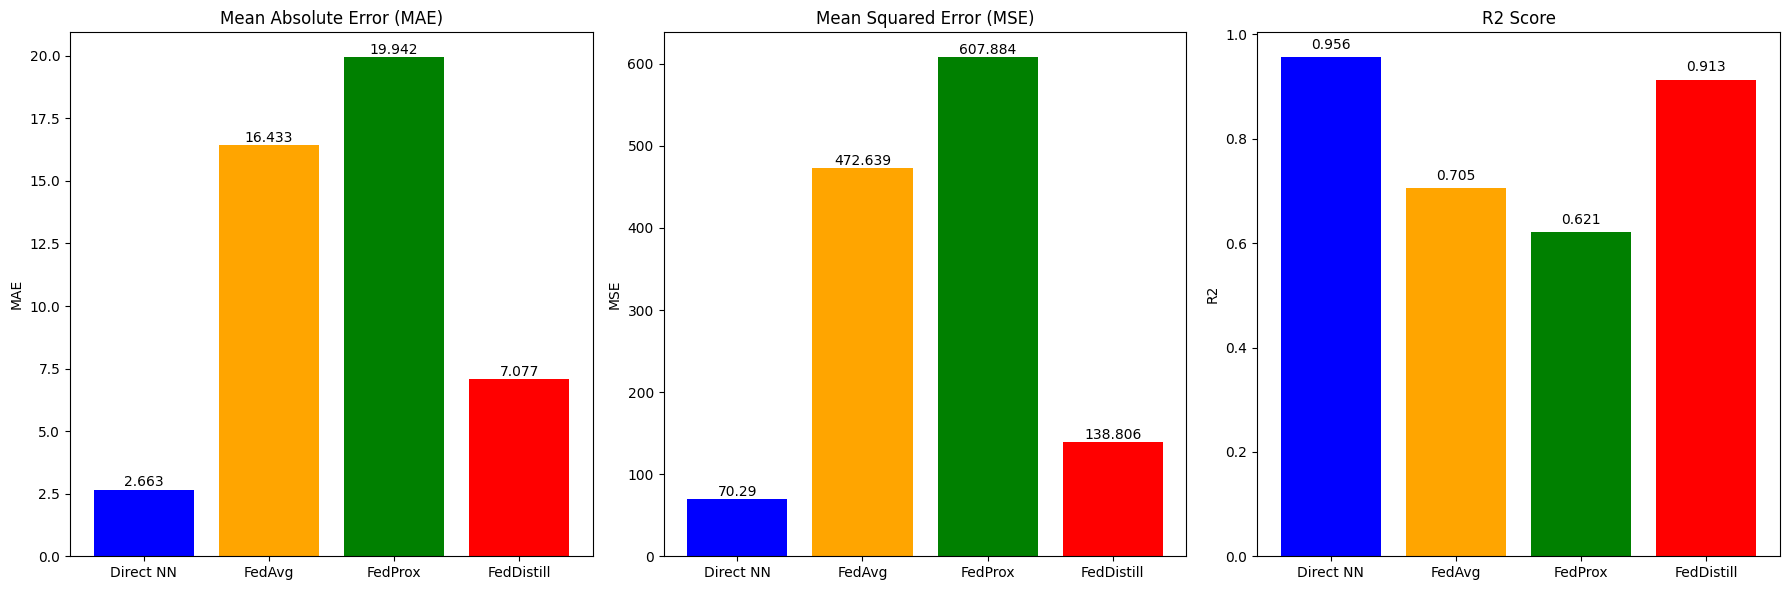

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Consolidate the results
results = {
    "Model": ["Direct NN", "FedAvg", "FedProx", "FedDistill"],
    "MAE": [mae_nn, mae_fedavg, mae_fedprox, mae_feddistill],
    "MSE": [mse_nn, mse_fedavg, mse_fedprox, mse_feddistill],
    "R2": [r2_nn, r2_fedavg, r2_fedprox, r2_feddistill],
}

# Convert to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results table
print("Performance Metrics Comparison:")
print(results_df)

# Bar chart for MAE, MSE, and R2
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot MAE
axes[0].bar(results["Model"], results["MAE"], color=["blue", "orange", "green", "red"])
axes[0].set_title("Mean Absolute Error (MAE)")
axes[0].set_ylabel("MAE")
# Add values on top of bars for MAE
for i, v in enumerate(results["MAE"]):
    axes[0].text(i, v + 0.01, round(v, 3), ha='center', va='bottom', fontsize=10)

# Plot MSE
axes[1].bar(results["Model"], results["MSE"], color=["blue", "orange", "green", "red"])
axes[1].set_title("Mean Squared Error (MSE)")
axes[1].set_ylabel("MSE")
# Add values on top of bars for MSE
for i, v in enumerate(results["MSE"]):
    axes[1].text(i, v + 0.01, round(v, 3), ha='center', va='bottom', fontsize=10)

# Plot R2
axes[2].bar(results["Model"], results["R2"], color=["blue", "orange", "green", "red"])
axes[2].set_title("R2 Score")
axes[2].set_ylabel("R2")
# Add values on top of bars for R2
for i, v in enumerate(results["R2"]):
    axes[2].text(i, v + 0.01, round(v, 3), ha='center', va='bottom', fontsize=10)

# Adjust layout and show plots
plt.tight_layout()
plt.show()
